# Boston House Price Prediction

## Overview
This project focuses on predicting the **median value of owner-occupied homes in Boston** using the classic Boston Housing dataset. The dataset includes information collected by the U.S. Census Service concerning housing in the Boston, Massachusetts area.

## Objective
The primary goal is to build a predictive model to estimate the **median value of homes (MEDV)** based on various predictor variables. This analysis aims to:
- Provide insights into the Boston housing market.
- Identify key drivers of median house value.

## Dataset
The dataset consists of **506 observations** with **14 attributes**:

| Feature | Description |
|--------|-------------|
| `CRIM` | Per capita crime rate by town |
| `ZN` | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| `INDUS` | Proportion of non-retail business acres per town |
| `CHAS` | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| `NOX` | Nitric oxides concentration (parts per 10 million) |
| `RM` | Average number of rooms per dwelling |
| `AGE` | Proportion of owner-occupied units built prior to 1940 |
| `DIS` | Weighted distances to five Boston employment centers |
| `RAD` | Index of accessibility to radial highways |
| `TAX` | Full-value property-tax rate per `$10,000` |
| `PTRATIO` | Pupil-teacher ratio by town |
| `B` | 1000(Bk - 0.63)^2, where Bk is the proportion of Black residents by town |
| `LSTAT` | % lower status of the population |
| `MEDV` | Median value of owner-occupied homes in $1000's (Target Variable) |

## Methodology
The project applies regression techniques to predict `MEDV`. The approach includes:

1. **Exploratory Data Analysis (EDA)**  
   Understand variable distributions, relationships, and correlations.

2. **Data Preprocessing & Feature Engineering**  
   Handle missing values, encode features, and prepare data for modeling.

3. **Model Building and Evaluation**
   - **Linear Regression**: A baseline model for interpretability.
   - **Decision Tree Regression**: Captures non-linear patterns using tree-based splits.
   - **Random Forest Regression**: An ensemble model that improves accuracy and reduces overfitting by combining multiple decision trees.

## Final Aim
Develop a model that:
- Accurately predicts housing prices in Boston.
- Identifies the most influential features affecting home value.


## Import Necessary Libraries

Libraries like `pandas`, `numpy`, `seaborn`, and `sklearn` are used for data handling, visualization, and machine learning model implementation.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Loading

Data is loaded into a DataFrame for inspection. Basic exploration includes checking structure, missing values, and summary statistics.

In [2]:
raw_data = pd.read_csv("HousingData.csv")

In [3]:
df = raw_data.copy()

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Data Cleaning and Data Preprocessing

In [7]:
df.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [8]:
from sklearn.impute import SimpleImputer #To fill Data with Mean, Mode

numberical_col  = ['CRIM', 'ZN', 'INDUS', 'AGE','LSTAT']
numberical_imputer = SimpleImputer(strategy = 'mean' )
df[numberical_col] = numberical_imputer.fit_transform(df[numberical_col])

In [9]:
categorical_cols = ['CHAS']
categorical_imputer = SimpleImputer(strategy = 'most_frequent') # Most Frequent - Mode
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [10]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


## Exploratory Data Analysis (EDA)

EDA helps uncover data distributions, correlations, and trends. Visual tools like heatmaps and scatter plots reveal feature-target relationships.

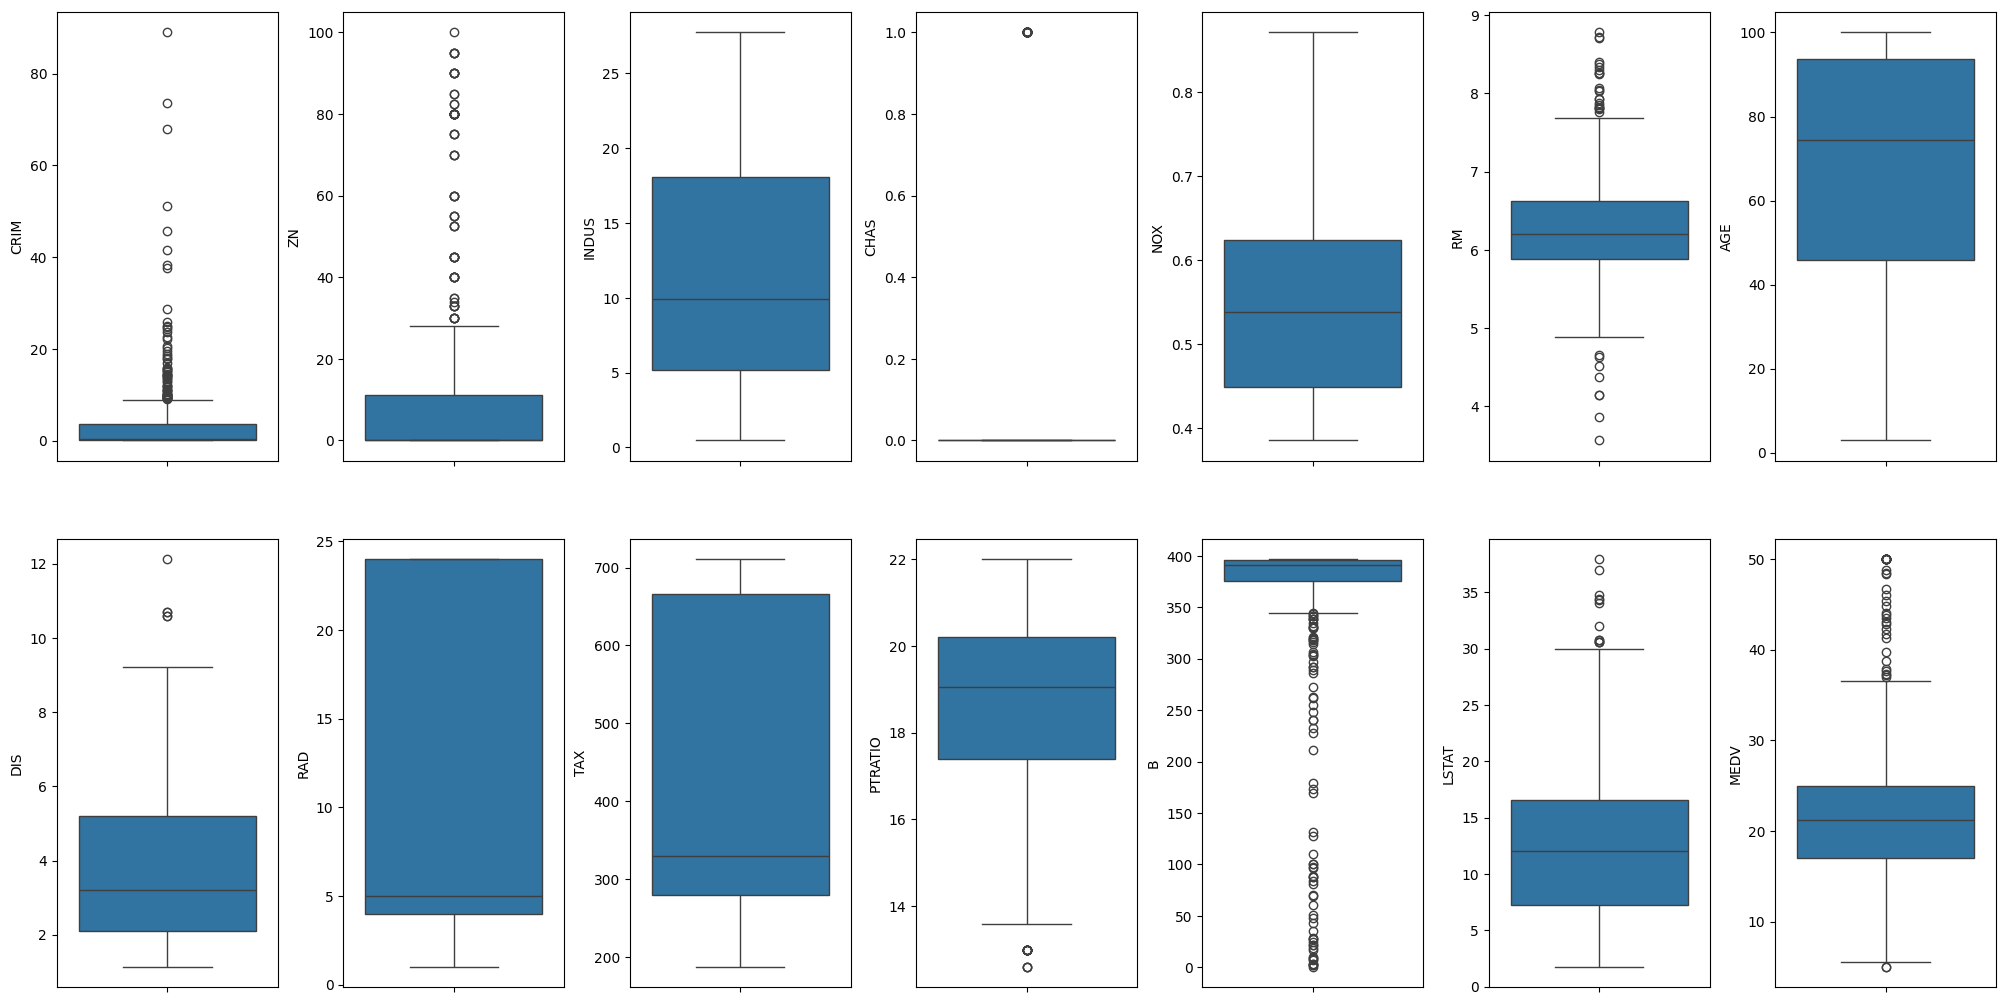

In [11]:
fig,ax = plt.subplots(ncols= 7,nrows = 2,figsize=(20,10))
index=0
ax = ax.flatten()

for col,value in df.items():
    sns.boxplot(y=col,data = df,ax = ax[index])
    index += 1
plt.tight_layout(pad=0.5,w_pad= 0.7,h_pad=5.0)

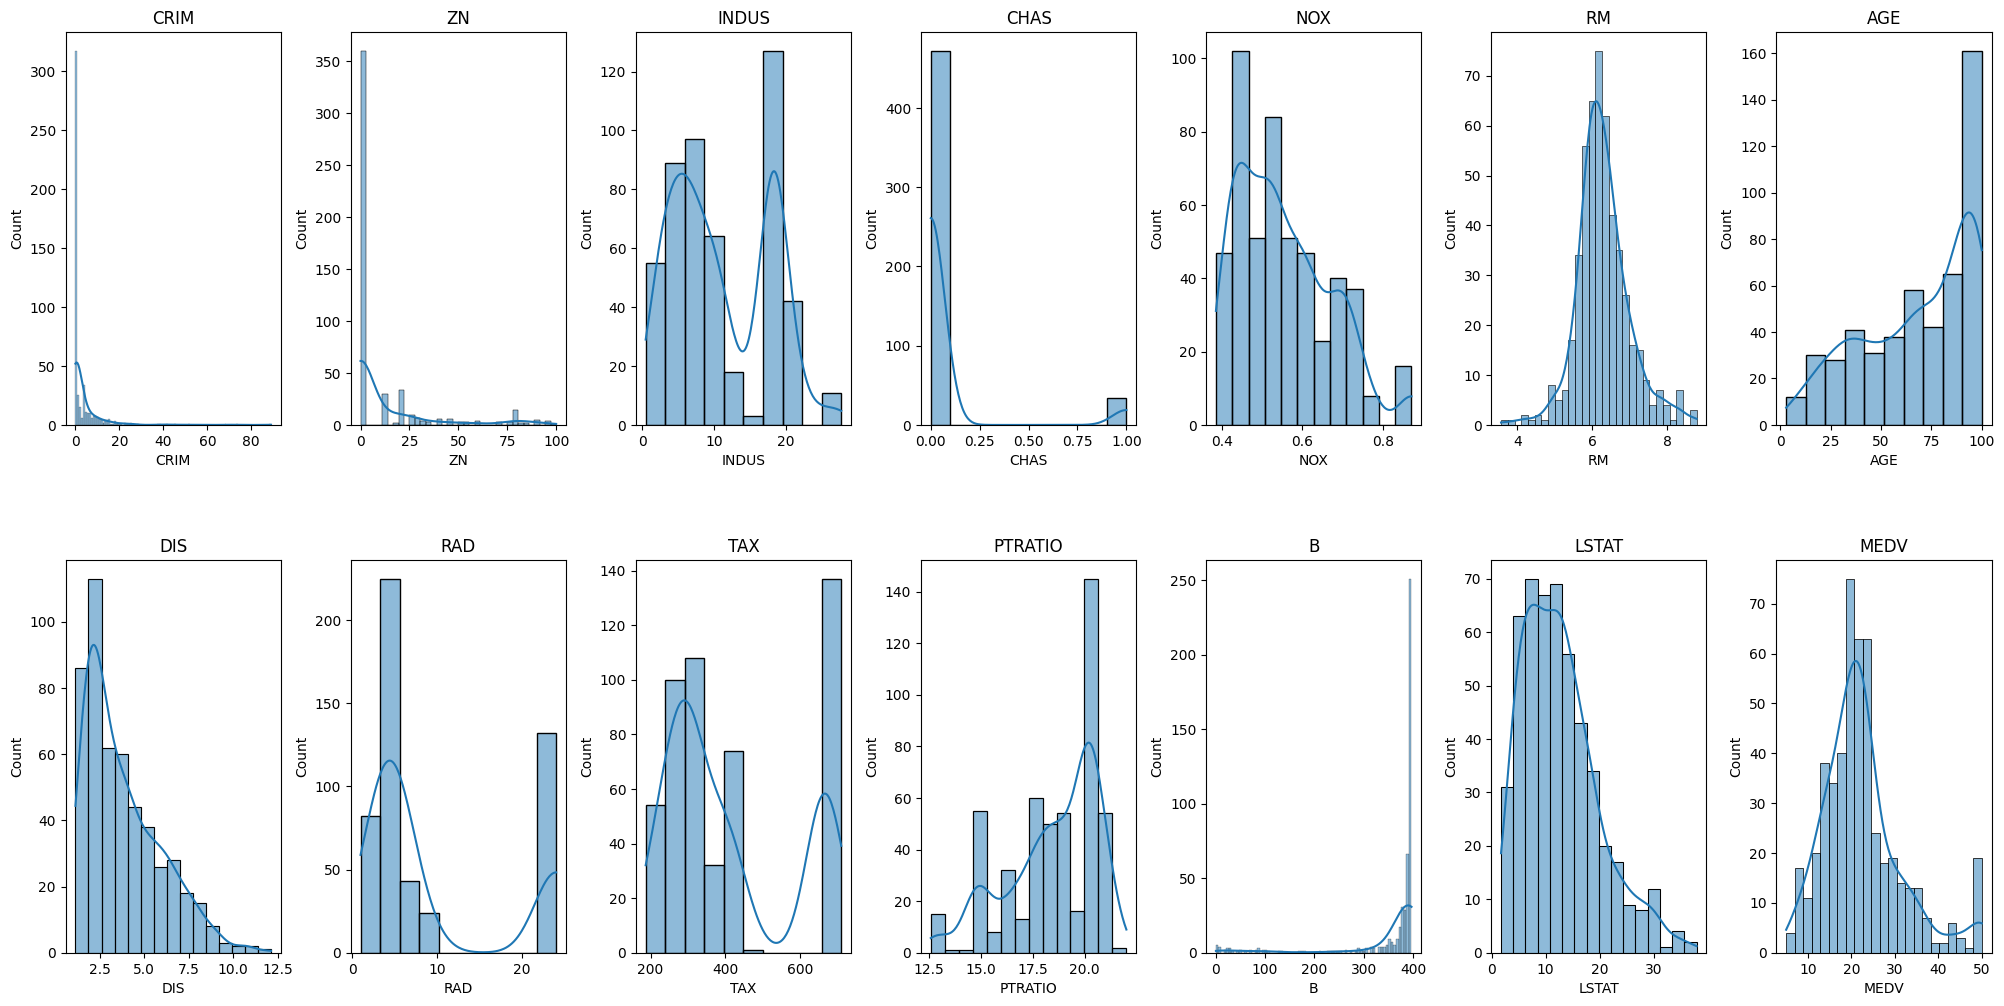

In [12]:
# Create a figure and a grid of subplots (7 columns and 2 rows)
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Flatten the array of axes for easy iteration
ax = ax.flatten()

# Loop through each column in the DataFrame
for index, col in enumerate(df.columns):
    # Create a histogram plot with KDE for each column
    sns.histplot(df[col], ax=ax[index], kde=True)  # Use histplot for distribution plot
    ax[index].set_title(col)  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Show the plot
plt.show()

## Min Max Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler
cols=['CRIM', 'ZN','TAX','B']
scaler = MinMaxScaler()
df[cols] = pd.DataFrame(scaler.fit_transform(df[cols]), columns=cols)

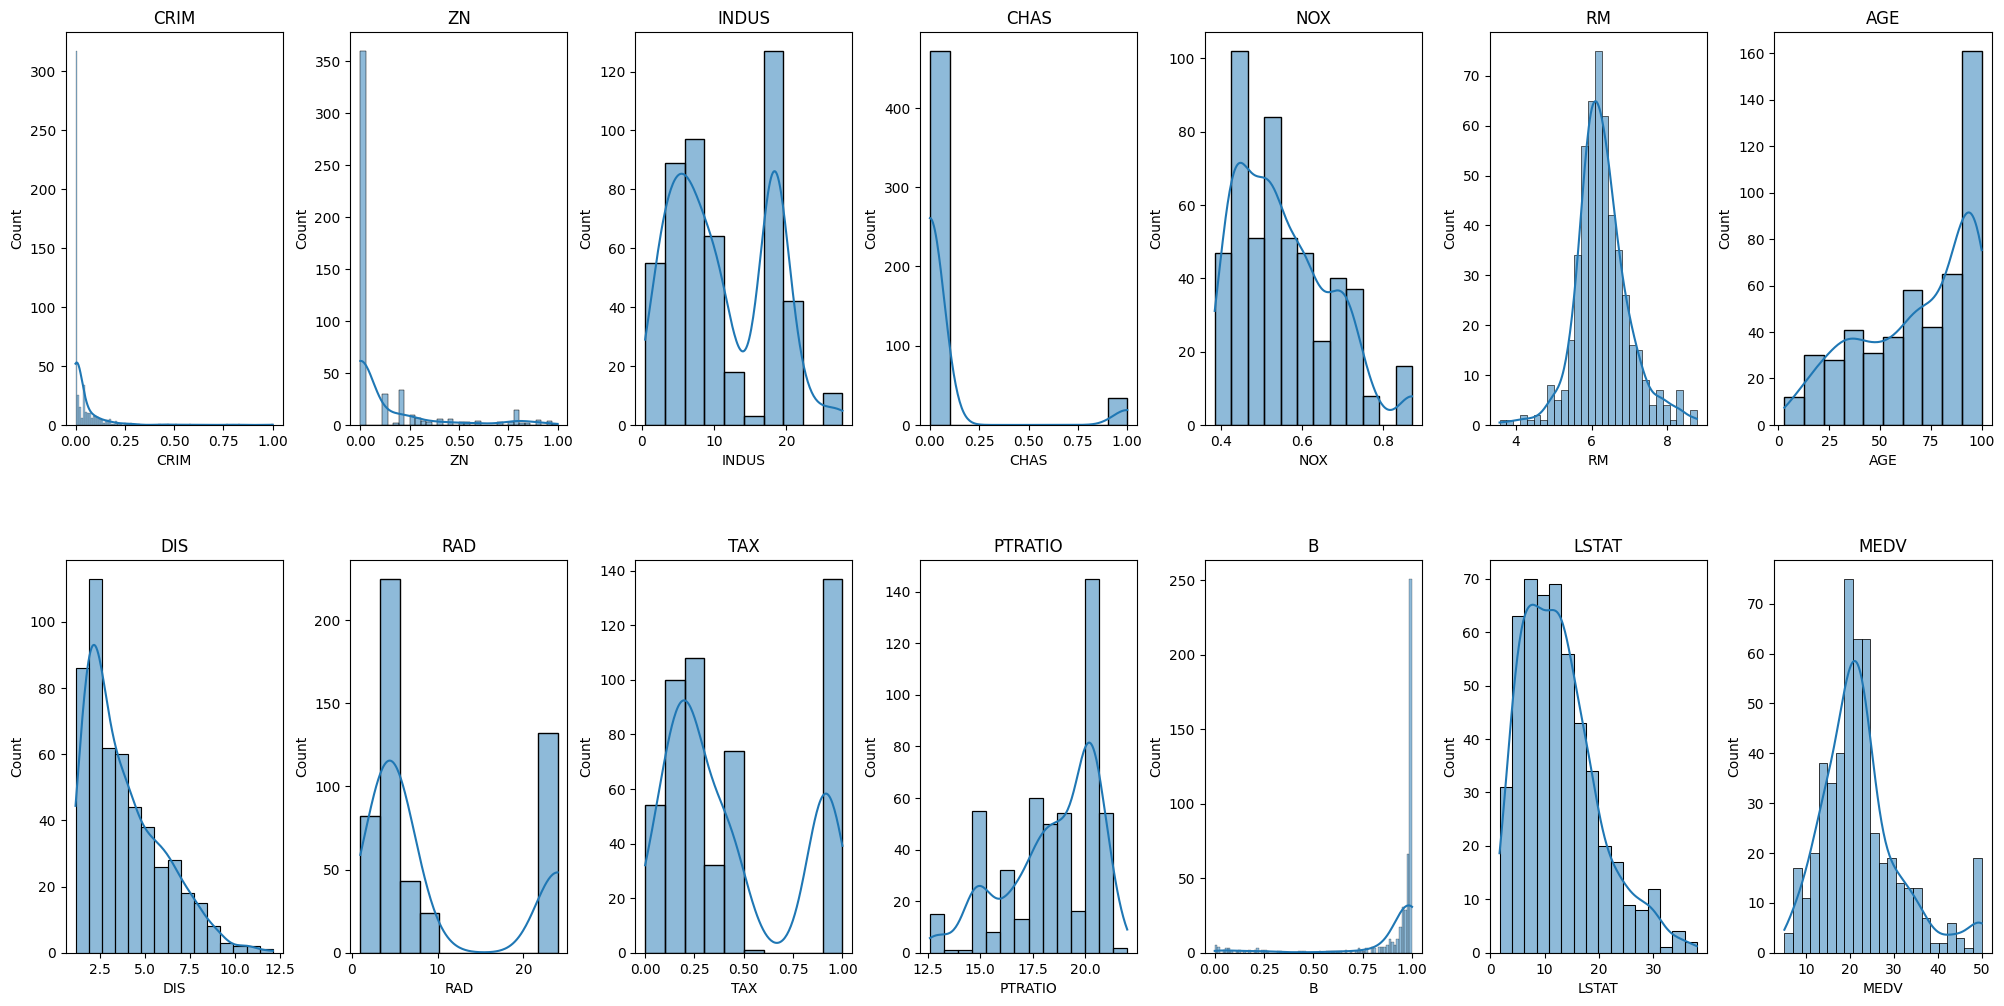

In [14]:
# Create a figure and a grid of subplots (7 columns and 2 rows)
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Flatten the array of axes for easy iteration
ax = ax.flatten()

# Loop through each column in the DataFrame
for index, col in enumerate(df.columns):
    # Create a histogram plot with KDE for each column
    sns.histplot(df[col], ax=ax[index], kde=True)  # Use histplot for distribution plot
    ax[index].set_title(col)  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Show the plot
plt.show()

## Standardization

In [15]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
scaled_cols = scaled.fit_transform(df[cols])
df[cols] = pd.DataFrame(scaled_cols,columns = cols)

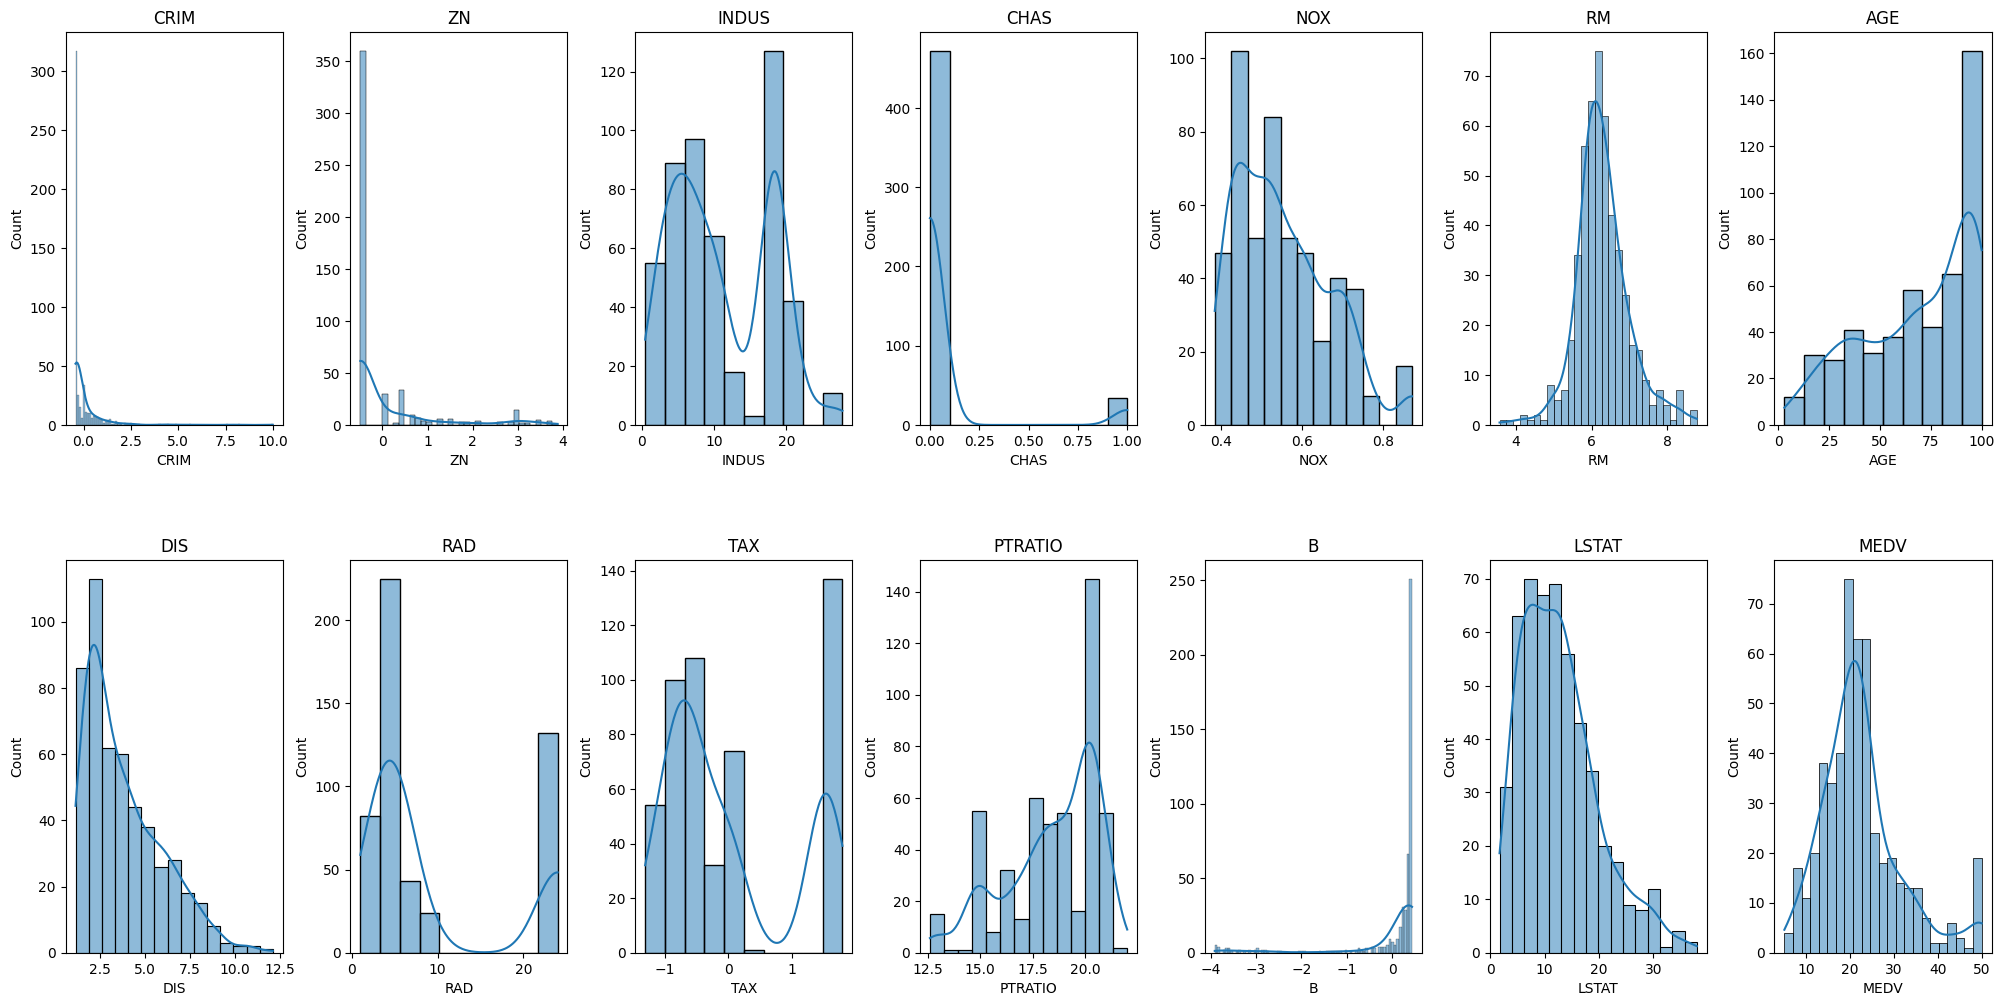

In [16]:
# Create a figure and a grid of subplots (7 columns and 2 rows)
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Flatten the array of axes for easy iteration
ax = ax.flatten()

# Loop through each column in the DataFrame
for index, col in enumerate(df.columns):
    # Create a histogram plot with KDE for each column
    sns.histplot(df[col], ax=ax[index], kde=True)  # Use histplot for distribution plot
    ax[index].set_title(col)  # Set title for each subplot

# Adjust layout to prevent overlap
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Show the plot
plt.show()

### Corelation Matrix

<Axes: >

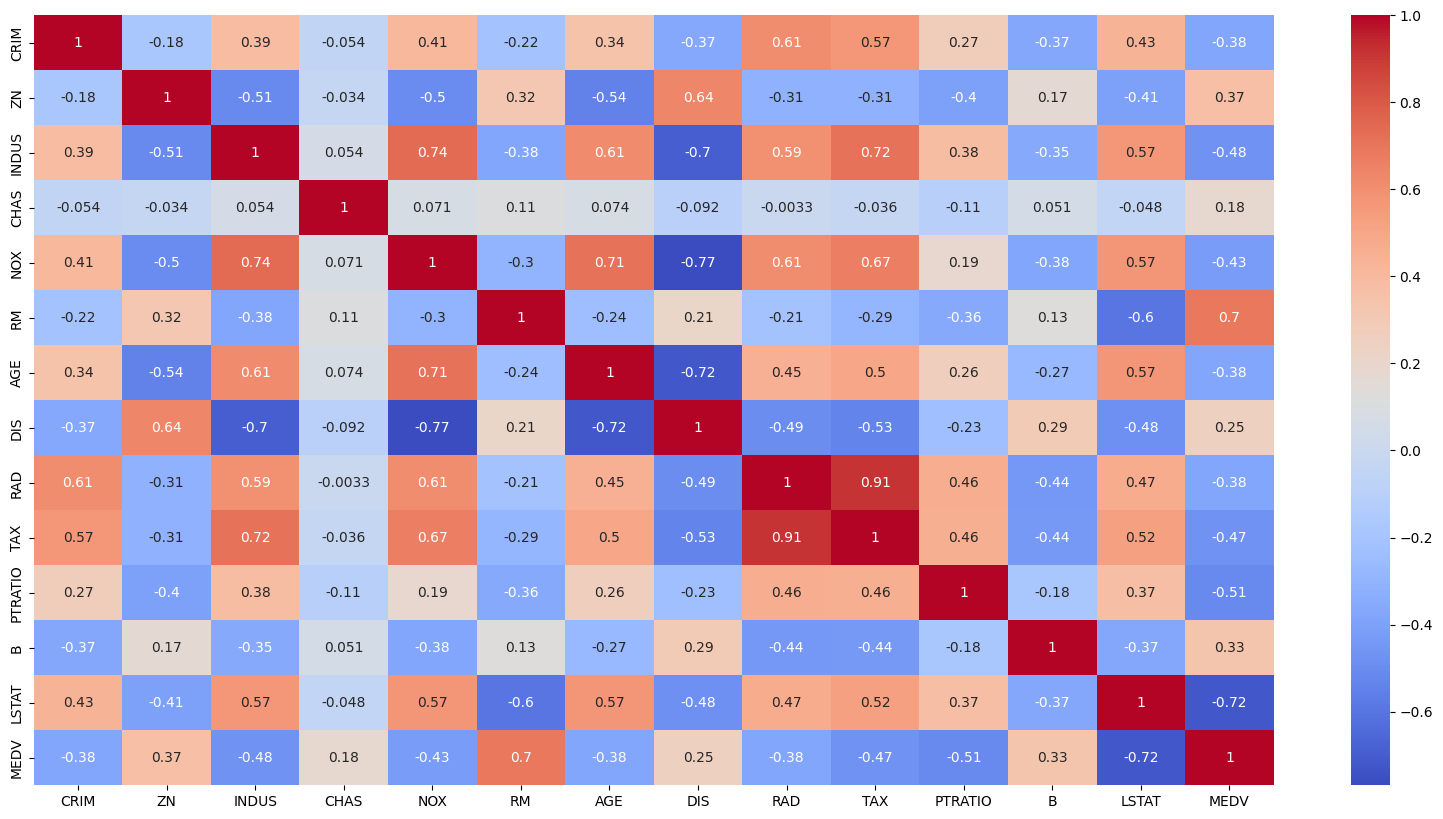

In [17]:
corr = df.corr()
plt.figure(figsize= (20,10))
sns.heatmap(corr,annot = True,cmap = 'coolwarm')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

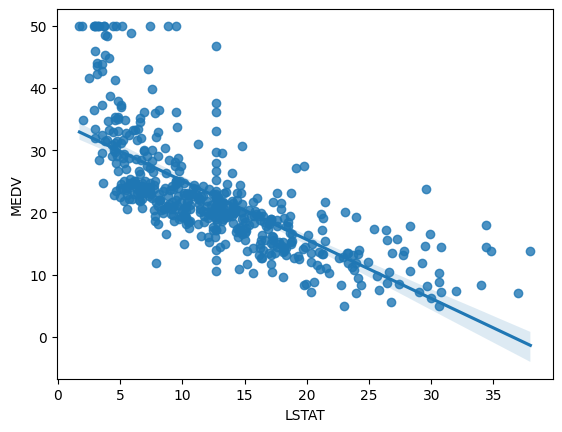

In [18]:
sns.regplot(y = df['MEDV'],x= df['LSTAT'])

<Axes: xlabel='RM', ylabel='MEDV'>

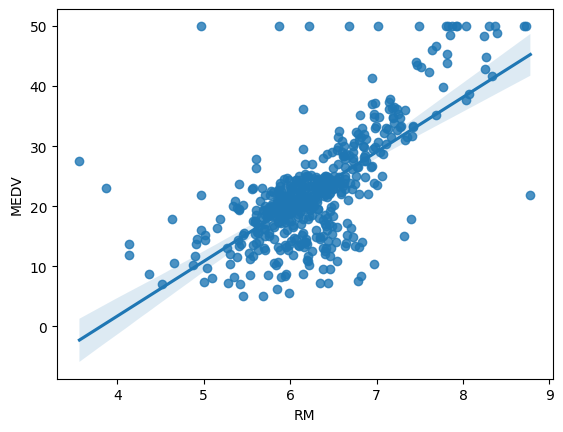

In [19]:
sns.regplot(y = df['MEDV'],x= df['RM'])

## Seperating Input and Target Columns

This step prepares data for modeling by selecting features and target.

In [20]:
input = df.drop(columns= ['MEDV','RAD'])
target = df['MEDV']

In [21]:
input.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.422328,0.296443,2.31,0.0,0.538,6.575,65.2,4.0900,-0.666608,15.3,0.441052,4.980000
1,-0.419870,-0.489639,7.07,0.0,0.469,6.421,78.9,4.9671,-0.987329,17.8,0.441052,9.140000
2,-0.419872,-0.489639,7.07,0.0,0.469,7.185,61.1,4.9671,-0.987329,17.8,0.396427,4.030000
3,-0.419277,-0.489639,2.18,0.0,0.458,6.998,45.8,6.0622,-1.106115,18.7,0.416163,2.940000
4,-0.414981,-0.489639,2.18,0.0,0.458,7.147,54.2,6.0622,-1.106115,18.7,0.441052,12.715432


In [22]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Splitting the Data into Training and Testing

This step prepares data for splitting into training and test sets to prevent overfitting.

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(input, target,test_size = 0.2, random_state= 42)

In [24]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((404, 12), (102, 12), (404,), (102,))

## Model Training and Evaluation

   - **Linear Regression**: A simple, interpretable model assuming a linear relationship between features and target.
   - **Decision Tree Regression**: Splits the data based on feature values to model complex, non-linear relationships.
   - **Random Forest Regression**: An ensemble method combining multiple decision trees to improve prediction accuracy and robustness.

Multiple regression models are trained and tested. Model accuracy is evaluated using metrics like R² and Mean Squared Error (MSE).

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

### 1. Linear Regression

In [26]:
model_1 = LinearRegression()
model_1.fit(X_train,Y_train)

LinearRegression()

In [27]:
# Predictions
pred = model_1.predict(X_test)

# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(Y_test, pred)
r2 = r2_score(Y_test, pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 26.84775024874625
R^2 Score: 0.6338965604699343


### 2. Decision Tree Regressor

In [28]:
from sklearn.tree import DecisionTreeRegressor


model_2 = DecisionTreeRegressor()
model_2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [29]:
# Predictions
pred = model_2.predict(X_test)

# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(Y_test, pred)
r2 = r2_score(Y_test, pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 14.152450980392157
R^2 Score: 0.8070132158673453


### 3. Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

model_3 = RandomForestRegressor()
model_3.fit(X_train,Y_train)

RandomForestRegressor()

In [31]:
# Predictions
pred = model_3.predict(X_test)

# Calculate Mean Squared Error and R^2 Score
mse = mean_squared_error(Y_test, pred)
r2 = r2_score(Y_test, pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 8.435007147058817
R^2 Score: 0.8849778808135654


Mean Squared Error: 8.41206199019608

R^2 Score: 0.8852907673969914